#### Part 1 - Data Scraping & Cleaning

In [1]:
%matplotlib inline

In [2]:
####
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# scrape data from wikipedia website
url = 'https://en.wikipedia.org/wiki/List_of_Nigerian_heads_of_state_by_age#List_of_heads_of_state_by_age_at_assuming_office'
table = pd.read_html(url)

# loop through to see dataframe structures
for i in table:
    print(i.columns)

Index(['Name', 'Date of birth', 'Date of death',
       'Date and age at assuming office'],
      dtype='object')
Index(['Rank', 'Head of state', 'Date of birth', 'Date of death',
       'Longevity (Years, Days)', 'Longevity (Days)'],
      dtype='object')
Index([0, 1], dtype='int64')
Index(['#', 'Head of state', 'Date of birth', 'Date of assuming office',
       'Age at assuming office', 'End of term', 'Age at end of term',
       'Length of retirement', 'Date of death', 'Lifespan'],
      dtype='object')


In [4]:
df = table[0]
df.head()

,Name,Date of birth,Date of death,Date and age at assuming office
0,Yakubu Gowon,19 October 1934,(living),1 August 1966 (aged 31)
1,Murtala Muhammed,8 November 1938,13 February 1976,29 July 1975 (aged 36)
2,Olusegun Obasanjo,5 March 1937,(living),13 February 1976 (aged 38)
3,Muhammadu Buhari,17 December 1942,(living),31 December 1983 (aged 41)
4,Johnson Aguiyi-Ironsi,3 March 1924,29 July 1966,16 January 1966 (aged 41)


##### Data cleaning and Transformation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Name                             16 non-null     object
 1   Date of birth                    16 non-null     object
 2   Date of death                    16 non-null     object
 3   Date and age at assuming office  16 non-null     object
dtypes: object(4)
memory usage: 640.0+ bytes


In [8]:
df['Date of death'] = pd.to_datetime(df['Date of death'], errors='coerce', format='%Y-%m-%d')
df.head()

,Name,Date of birth,Date of death,Date and age at assuming office
0,Yakubu Gowon,19 October 1934,NaT,1 August 1966 (aged 31)
1,Murtala Muhammed,8 November 1938,1976-02-13,29 July 1975 (aged 36)
2,Olusegun Obasanjo,5 March 1937,NaT,13 February 1976 (aged 38)
3,Muhammadu Buhari,17 December 1942,NaT,31 December 1983 (aged 41)
4,Johnson Aguiyi-Ironsi,3 March 1924,1966-07-29,16 January 1966 (aged 41)


In [11]:
# Get the current date
current_date = pd.to_datetime('today')

# Fill NaT values with the current date
df['Date of death'] = df['Date of death'].fillna(current_date)
df.head()

,Name,Date of birth,Date of death,Date and age at assuming office
0,Yakubu Gowon,19 October 1934,2024-05-13 07:45:29.862693,1 August 1966 (aged 31)
1,Murtala Muhammed,8 November 1938,1976-02-13 00:00:00.000000,29 July 1975 (aged 36)
2,Olusegun Obasanjo,5 March 1937,2024-05-13 07:45:29.862693,13 February 1976 (aged 38)
3,Muhammadu Buhari,17 December 1942,2024-05-13 07:45:29.862693,31 December 1983 (aged 41)
4,Johnson Aguiyi-Ironsi,3 March 1924,1966-07-29 00:00:00.000000,16 January 1966 (aged 41)


In [12]:
# convert the date of birth columns to datetime
df['Date of birth'] = pd.to_datetime(df['Date of birth'])

# Extract year of birth and convert to string
df['year of birth'] = pd.to_datetime(df['Date of birth']).dt.year.astype(str)

# Calculate age by subtracting birth dates from current date
df['age'] = df['Date of death'].dt.year - df['Date of birth'].dt.year


In [15]:
# delete not so useful columns
del df['Date of birth']
del df['Date of death']
del df['Date and age at assuming office']


df.head()

,Name,year of birth,age
0,Yakubu Gowon,1934,90
1,Murtala Muhammed,1938,38
2,Olusegun Obasanjo,1937,87
3,Muhammadu Buhari,1942,82
4,Johnson Aguiyi-Ironsi,1924,42


In [16]:
df.to_csv('datasets')

#### Part 2 - Data Visualization Design

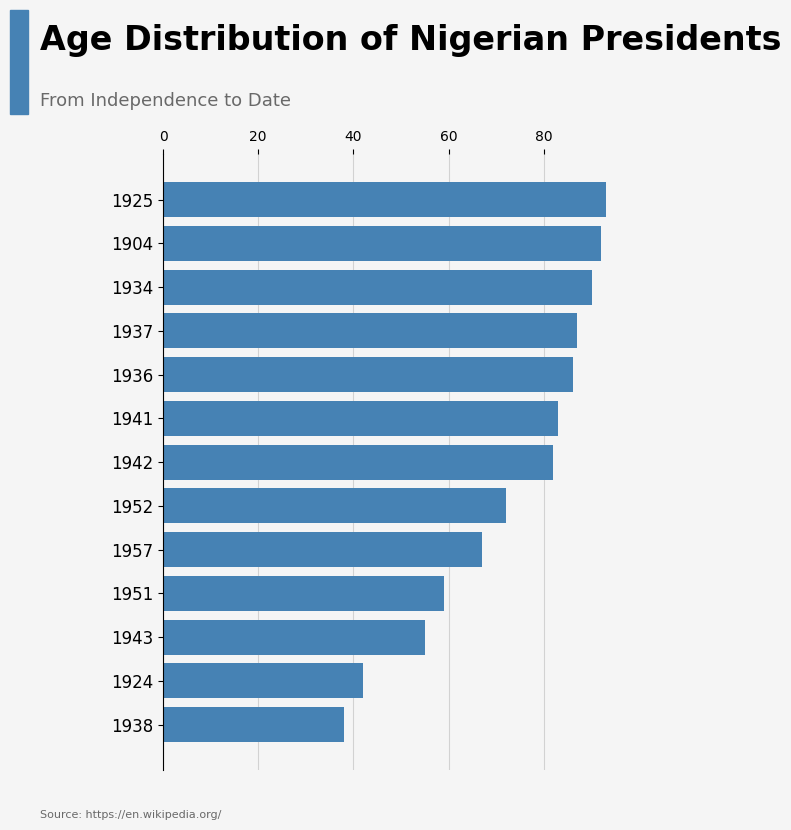

In [22]:
# Sort the data
df_sorted = df.sort_values(by='age', ascending=True)

# Initialize layout
fig, ax = plt.subplots(figsize=(6, 8))

# Add grey background
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')

colors = ['steelblue']

# Create the plot
ax.barh(df_sorted['year of birth'], df_sorted['age'],
        color=colors,  # colors for each data point
        zorder=2  # specify that the bars are drawn after the grid
        )

# Add vertical grey grid lines
ax.grid(linestyle='-',  # type of lines
        alpha=0.5,  # opacity
        axis='x'  # specify that we only want vertical lines
        )

# Title
title = "Age Distribution of Nigerian Presidents"
fig.text(-0.08, 1.01,  # relative position
         title,
         fontsize=24,  # High font size for style
         fontweight='bold',
         ha='left',  # align to the left
         family='dejavu sans'
         )

# Subtitle
subtitle = 'From Independence to Date'
fig.text(-0.08, 0.94,  # relative position
         subtitle,
         fontsize=13,  # High font size for style
         color='dimgrey',
         ha='left',  # align to the left
         family='dejavu sans'
         )

# Details and Credit
text = 'Source: https://en.wikipedia.org/'
fig.text(-0.08, 0.05,  # relative position
         text,
         fontsize=8,  # High font size for style
         color='dimgrey',
         ha='left',  # align to the left
         family='dejavu sans'
         )

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Change axis position and labels
ax.tick_params(axis='y', labelsize=12)
ax.xaxis.tick_top()

# Add yellow rectangle (optional)
rectangle_color = 'steelblue'
rect = patches.Rectangle((-0.13, 0.93), 0.03, 0.13,
                         linewidth=1, edgecolor=rectangle_color,
                         facecolor=rectangle_color, transform=fig.transFigure)
fig.patches.append(rect)

# export a high quality chart
plt.savefig("Age_dist.png", dpi=300, bbox_inches='tight')


# Display the final chart
plt.show()
